# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
sets = [cities[x:x+50] for x in range(0,len(cities),50)]

lat = []
lng = []
max_temp = []
humidity=[]
cloudiness = []
wind_speed = []
country = []
date = []
cities2 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print(f"Beginning Data Retrieval")
for i in range(len(sets)):
    print(f"--------------------------------")
    time.sleep(60)
    for x in range(len(sets[i])):
        response = requests.get(query_url + sets[i][x]).json()
        try:
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            cities2.append(sets[i][x])
            print(f" Processing Record {x+1} of Set {i+1} | {sets[i][x]}")
        except:
            print(f"City not found. Skipping...")
            pass

data_df = pd.DataFrame({"City" : cities2, 
                        "Lat" : lat, 
                        "Lng" : lng, 
                        "Max Temp" : max_temp, 
                        "Humidity" : humidity, 
                        "Cloudiness" : cloudiness, 
                        "Wind Speed" : wind_speed, 
                        "Country" : country, 
                        "Date" : date})
data_df

Beginning Data Retrieval
--------------------------------
 Processing Record 1 of Set 1 | ushuaia
 Processing Record 2 of Set 1 | bluff
City not found. Skipping...
 Processing Record 4 of Set 1 | rikitea
 Processing Record 5 of Set 1 | yellowknife
 Processing Record 6 of Set 1 | mataura
 Processing Record 7 of Set 1 | avera
City not found. Skipping...
 Processing Record 9 of Set 1 | vaini
 Processing Record 10 of Set 1 | nazret
 Processing Record 11 of Set 1 | kapaa
 Processing Record 12 of Set 1 | kavieng
 Processing Record 13 of Set 1 | puerto ayora
City not found. Skipping...
 Processing Record 15 of Set 1 | vryheid
 Processing Record 16 of Set 1 | jiaozuo
 Processing Record 17 of Set 1 | saldanha
 Processing Record 18 of Set 1 | callaway
 Processing Record 19 of Set 1 | punta arenas
 Processing Record 20 of Set 1 | ranfurly
 Processing Record 21 of Set 1 | deer lake
 Processing Record 22 of Set 1 | tangua
City not found. Skipping...
 Processing Record 24 of Set 1 | hobart
 Processi

 Processing Record 49 of Set 4 | honningsvag
 Processing Record 50 of Set 4 | rochester
--------------------------------
 Processing Record 1 of Set 5 | necochea
City not found. Skipping...
 Processing Record 3 of Set 5 | itoman
 Processing Record 4 of Set 5 | kloulklubed
 Processing Record 5 of Set 5 | acarau
 Processing Record 6 of Set 5 | vila franca do campo
 Processing Record 7 of Set 5 | chuy
 Processing Record 8 of Set 5 | lobez
City not found. Skipping...
 Processing Record 10 of Set 5 | chino valley
 Processing Record 11 of Set 5 | kiama
 Processing Record 12 of Set 5 | kahului
City not found. Skipping...
 Processing Record 14 of Set 5 | gat
 Processing Record 15 of Set 5 | carutapera
 Processing Record 16 of Set 5 | saskylakh
 Processing Record 17 of Set 5 | kruisfontein
 Processing Record 18 of Set 5 | victoria
 Processing Record 19 of Set 5 | cidreira
 Processing Record 20 of Set 5 | vernon
 Processing Record 21 of Set 5 | pevek
City not found. Skipping...
 Processing Recor

 Processing Record 47 of Set 8 | lagoa
 Processing Record 48 of Set 8 | prince rupert
 Processing Record 49 of Set 8 | yanam
 Processing Record 50 of Set 8 | klyuchi
--------------------------------
 Processing Record 1 of Set 9 | isangel
 Processing Record 2 of Set 9 | harper
 Processing Record 3 of Set 9 | kraksaan
 Processing Record 4 of Set 9 | oranjemund
 Processing Record 5 of Set 9 | bafoulabe
 Processing Record 6 of Set 9 | banjarmasin
 Processing Record 7 of Set 9 | punta de piedra
 Processing Record 8 of Set 9 | xunchang
 Processing Record 9 of Set 9 | senneterre
 Processing Record 10 of Set 9 | flin flon
 Processing Record 11 of Set 9 | port blair
 Processing Record 12 of Set 9 | prainha
City not found. Skipping...
 Processing Record 14 of Set 9 | vero beach
City not found. Skipping...
 Processing Record 16 of Set 9 | abu zabad
 Processing Record 17 of Set 9 | torres
 Processing Record 18 of Set 9 | sakakah
 Processing Record 19 of Set 9 | manggar
City not found. Skipping...

 Processing Record 39 of Set 12 | boa vista
 Processing Record 40 of Set 12 | yumbe
 Processing Record 41 of Set 12 | damietta
 Processing Record 42 of Set 12 | sungairaya
 Processing Record 43 of Set 12 | porto novo
 Processing Record 44 of Set 12 | krasnoselkup
 Processing Record 45 of Set 12 | vanimo
 Processing Record 46 of Set 12 | sedalia
 Processing Record 47 of Set 12 | mhlambanyatsi
 Processing Record 48 of Set 12 | romny
 Processing Record 49 of Set 12 | chimbote


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,44.22,81,40,5.75,AR,1648997654
1,bluff,-46.6000,168.3333,56.95,73,62,11.79,NZ,1648997655
2,rikitea,-23.1203,-134.9692,75.87,64,41,8.79,PF,1648997655
3,yellowknife,62.4560,-114.3525,5.41,80,20,11.50,CA,1648997656
4,mataura,-46.1927,168.8643,45.30,98,53,1.83,NZ,1648997415
...,...,...,...,...,...,...,...,...,...
541,vanimo,-2.6741,141.3028,78.33,85,99,0.65,PG,1648998487
542,sedalia,38.7045,-93.2283,57.85,43,0,13.00,US,1648998488
543,mhlambanyatsi,-26.4500,31.0167,60.06,97,100,0.27,SZ,1648998488
544,romny,50.7510,33.4747,35.94,85,100,8.30,UA,1648998488


In [5]:
data_df.to_csv("starter_code/weather_data.csv",
              encoding="utf-8", index=False, header=True)

In [6]:
data_measures = data_df[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()
data_measures

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,18.617412,15.612698,59.392363,68.811355,62.412088,8.370366
std,33.532864,91.049868,25.669902,23.514804,38.317177,5.752380
min,-54.800000,-179.166700,-29.200000,3.000000,0.000000,0.000000
25%,-8.573650,-63.836300,44.182500,59.000000,23.250000,3.875000
50%,23.042200,21.402150,64.950000,74.000000,75.000000,7.095000
75%,46.710750,100.349575,79.277500,85.750000,100.000000,11.612500
max,78.218600,179.316700,106.830000,100.000000,100.000000,32.700000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Make sure there are no humidity over 100%

if int(max(data_df["Humidity"])) <= 100:
    print(f'Max humitidity is 100% or below')
    
else:
        for i in range(len(data_df["Humidity"])):
            humidityindex = []
            if data_df["Humidity"][i] > 100:
                humidityindex.append([i])
            else:
                pass
          


Max humitidity is 100% or below


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

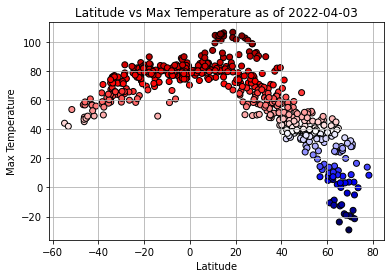

In [29]:
todaysdate = datetime.date.today()


colors = data_df["Max Temp"]
plt.scatter(data_df['Lat'], data_df['Max Temp'],c=colors,cmap="seismic",edgecolor='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Latitude vs Max Temperature as of {todaysdate}')

plt.savefig("Images/latitude_vs_Plot.png")
plt.show()

In [55]:
##Comparing latitud vs Max temperature allows us to identify the co-relation between both variables, as seen in the plot, the closest the cities are to the equator the more likely they are to have higher temperatures.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

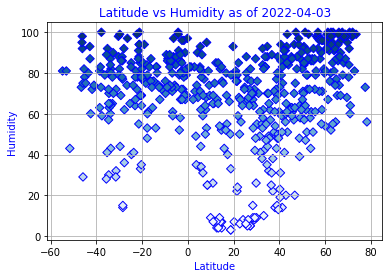

In [16]:
colors = data_df["Humidity"]
plt.scatter(data_df['Lat'], data_df['Humidity'],c=colors,cmap="Blues",marker="D",edgecolors="blue")
plt.grid(True)
plt.xlabel('Latitude',color='blue')
plt.ylabel('Humidity',color='blue')
plt.title(f'Latitude vs Humidity as of {todaysdate}',color="blue")

plt.savefig("Images/latitude_vs_Humidity.png")
plt.show

In [ ]:
##In this case latitude and Humidity seem to not have any corelation.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

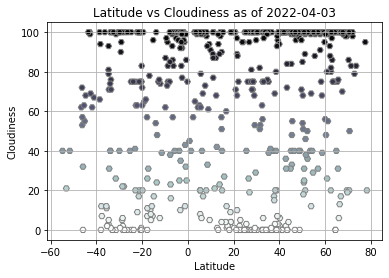

In [13]:
colors = data_df["Cloudiness"]
plt.scatter(data_df['Lat'], data_df['Cloudiness'],c=colors,cmap="bone_r",edgecolors="grey",marker="H")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness as of {todaysdate}')

plt.savefig("Images/latitude_vs_Clouds.png")
plt.show

In [ ]:
## When comparing the latitude of our cities against the cloudiness, it is clear that latitude does not represent a factor we could use to predict cloudiness.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

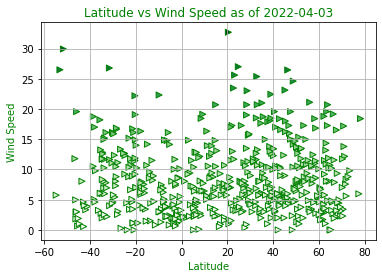

In [17]:
colors = data_df["Wind Speed"]
plt.scatter(data_df['Lat'], data_df['Wind Speed'],c=colors,cmap="Greens",edgecolors="green",marker=">")
plt.grid(True)
plt.xlabel('Latitude',color='green')
plt.ylabel('Wind Speed',color='green')
plt.title(f'Latitude vs Wind Speed as of {todaysdate}',color="green")

plt.savefig("Images/latitude_vs_WS.png")
plt.show

In [ ]:
## Just like with the last two plots wind speed does not seem to be related to a cities latitude. 

## Linear Regression

In [19]:
data_df_nh = data_df.loc[data_df["Lat"] > 0, : ]
data_df_sh = data_df.loc[data_df["Lat"] < 0, : ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7670096003471103


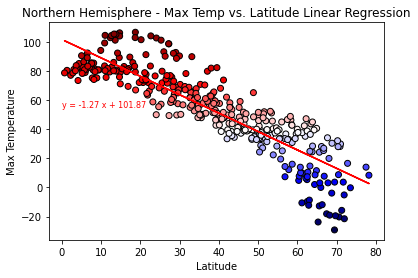

In [77]:
name = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_nh['Lat'],data_df_nh['Max Temp'])

regress_values1 = data_df_nh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_nh["Max Temp"]

plt.scatter(data_df_nh['Lat'], data_df_nh['Max Temp'],c=colors,cmap="seismic",edgecolor='black')
plt.plot(data_df_nh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(0,55),fontsize=8,color="red")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')

plt.savefig(f'Images/{name}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5220596752125174


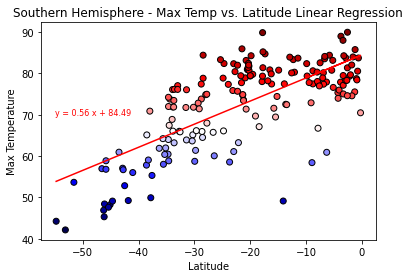

In [78]:
name = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_sh['Lat'],data_df_sh['Max Temp'])

regress_values2 = data_df_sh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_sh["Max Temp"]

plt.scatter(data_df_sh['Lat'], data_df_sh['Max Temp'],c=colors,cmap="seismic",edgecolor='black')
plt.plot(data_df_sh['Lat'], regress_values2, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-55,70),fontsize=8,color="red")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

In [ ]:
## Our linear regression and r-value suggest the latitud could be use to predict a citie's max temperature based off our data. both north and south have r-values higher than 0.5.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18128680635812364


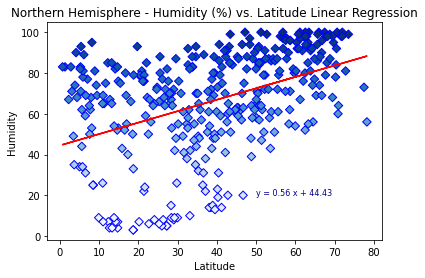

In [80]:
name="Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_nh['Lat'],data_df_nh['Humidity'])

regress_values3 = data_df_nh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_nh['Humidity']

plt.scatter(data_df_nh['Lat'], data_df_nh['Humidity'],c=colors,cmap="Blues",marker="D",edgecolors="blue")
plt.plot(data_df_nh['Lat'], regress_values3, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=8,color="darkblue")
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02621209884838462


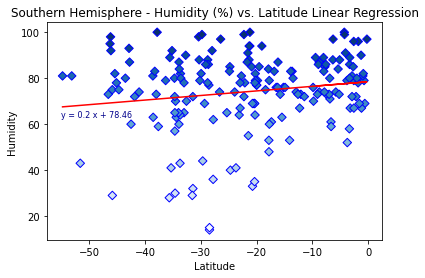

In [81]:
name = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_sh['Lat'],data_df_sh['Humidity'])

regress_values4 = data_df_sh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_sh['Humidity']

plt.scatter(data_df_sh['Lat'], data_df_sh['Humidity'],c=colors,cmap="Blues",marker="D",edgecolors="blue")
plt.plot(data_df_sh['Lat'], regress_values4, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,63),fontsize=8,color="darkblue")
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

In [ ]:
## the r-value for the norther hesmiphere is quite closer to 1 that the one for the souther hemisphere, which could indicate that there is more predicatbility for Humidity for cities in the northern hemisphere based off the latitud.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030783726575381955


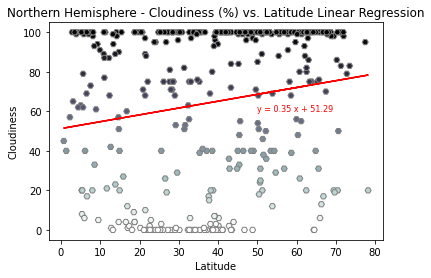

In [82]:
name='Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_nh['Lat'],data_df_nh['Cloudiness'])

regress_values4 = data_df_nh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_nh['Cloudiness']

plt.scatter(data_df_nh['Lat'], data_df_nh['Cloudiness'],c=colors,cmap="bone_r",edgecolors="grey",marker="H")
plt.plot(data_df_nh['Lat'], regress_values4, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,60),fontsize=8,color="red")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041914135791408125


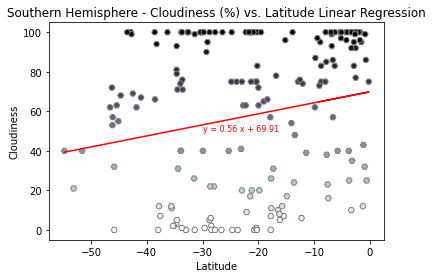

In [83]:
name = 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_sh['Lat'],data_df_sh['Cloudiness'])

regress_values4 = data_df_sh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_sh['Cloudiness']

plt.scatter(data_df_sh['Lat'], data_df_sh['Cloudiness'],c=colors,cmap="bone_r",edgecolors="grey",marker="H")
plt.plot(data_df_sh['Lat'], regress_values4, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,50),fontsize=8,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

In [ ]:
## r-value for cloudiness vs latitud is far from 1 suggesting that latitud is not good enough factor to predict the cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0004939291728504276


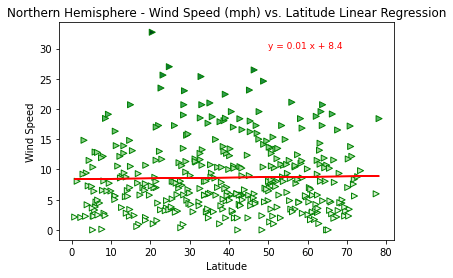

In [85]:
name = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_nh['Lat'],data_df_nh['Wind Speed'])

regress_values4 = data_df_nh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_nh['Wind Speed']

plt.scatter(data_df_nh['Lat'], data_df_nh['Wind Speed'],c=colors,cmap="Greens",edgecolors="green",marker=">")
plt.plot(data_df_nh['Lat'], regress_values4, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(50,30),fontsize=9,color="red")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06578325424744004


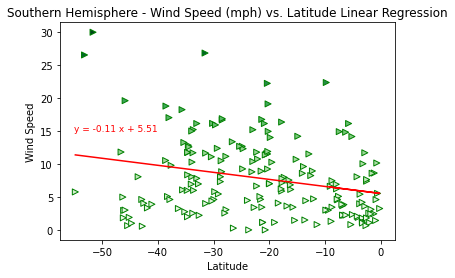

In [84]:
name='Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_sh['Lat'],data_df_sh['Wind Speed'])

regress_values4 = data_df_sh['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

colors = data_df_sh['Wind Speed']

plt.scatter(data_df_sh['Lat'], data_df_sh['Wind Speed'],c=colors,cmap="Greens",edgecolors="green",marker=">")
plt.plot(data_df_sh['Lat'], regress_values4, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,15),fontsize=9,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f'The r-value is: {rvalue**2}')
plt.savefig(f'Images/{name}.png')
plt.show()

In [ ]:
## The r-value for wind speed vs latitude is so far from 1 that there is really no predictability of wind speed by having latitude